# ¿Cuál es el mensaje escondido?
![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRVrjpKx4sHO1Yo-SQTeRuZb4exdo84SGnq9ZcDKzeTneuaN_GXxz4JKplrmAECkvxlpRk&usqp=CAU)

__Objetivo__: Investiga las pistas y descubre cuál es el mensaje escondido. Lee cuidadosamente las pistas proporcionadas y codifica los elementos que se piden.

### Conocimientos requeridos:
- __numpy__
    - ```array```
    - ```array_split```
    - ```reshape```
    - ```ufunc```
    - ```vstack```, ```hstack```, ```concatenate```
    - __filtros__
    - __máscaras__
- __matplotlib__
    - ```imshow```




## Paso 1
Descarga los archivos ejecutando el código de la siguiente celda.

## Paso 2
Abre los archivos _who.dat_ y _criba.dat_. Ambos contienen arreglos numéricos de enteros, en una sola linea, separados por espacios. Guarda la información en su correspondiente arreglo de _numpy_.

In [64]:
import numpy as np

who = np.array([i.strip().split(' ') for i in open("who.dat").readlines()], dtype='int')
who = who.flatten()
criba = np.array([i.strip().split(' ') for i in open("criba.dat").readlines()], dtype='int')
criba = criba.flatten()

print(who.shape, criba.shape)

(1400000,) (219456,)


El archivo _who_ contiene información escondida, pero el tiempo ha hecho que el mensaje no esté muy claro. Revisa los contenidos del arreglo para ver si logras descubrir algo. _(Exploración libre)_

Unos arqueólogos han descubierto en unas ciertas ruinas dos series de números que a su parecer esconden la clave para la paz mundial. Les han llamado el arreglo _who_ y el arreglo _criba_.

## Pista 1
- Cada número del arreglo _who_ fue calculado meticulosamente por unos monjes tibetanos que lograban descubrir uno de los números cada día y los apuntaban de manera secuencial en una lista.
Sin embargo, los monjes eran muy rigurosos en sus fines de semana y hacían fiestas legendarias cada sábado y domingo. Esos días agregaban el número correspondiente al arreglo, pero era sólo un número aleatorio insertado después de la fiesta de ese día. Remueve los elementos basura para encontrar ___el verdadero arreglo who___

- Si se sabe que los monjes iniciaron su trabajo un __lunes__, crea una máscara de _numpy_ que se pueda aplicar sobre el arreglo _who_. La máscara debe aceptar los valores calculados en la semana, y remover los del fin de semana.  

- Después aplica la máscara al arreglo.

- ¿Cuántos elementos quedaron después de filtrar?

In [65]:
monk_mask = [True, True, True, True, True, False, False] * int(who.shape[0]/7)
who = who[monk_mask]
print(f"El arreglo tiene {who.shape[0]} elementos")

El arreglo tiene 1000000 elementos


## Pista 2
Si se genera una tablilla de arcilla con una rejilla de un millón de elementos y se colocan sobre el verdadero arreglo _who_, de manera que cada retícula cubra un número, al perforar las posiciones de la _criba_ se descubre un patrón que puede iluminar el camino correcto.
- Utiliza la _criba_ para elegir los índices correctos del arreglo _who_.
- ¿Cuántos elementos quedaron?

In [66]:
who = who[criba]
print(f"El arreglo tiene {who.shape[0]} elementos")

El arreglo tiene 219456 elementos


## Pista 3
Hay un cierto número cuadrado perfecto, que en el calendario gregoriano representa un año que cambió de manera drástica el rumbo del país del Ombligo de la Luna, podríamos decir que hubo un choque de culturas. Se puede considerar que ese año marca un antes y un después en los valores del arreglo _who_.
- Crea un arreglo de _numpy_ con los cuadrados perfectos e identifica el año en cuestión.
- Utiliza ese año para crear una máscara con el arreglo _who_. Esa máscara contiene la ___verdadera verdadera información___.

In [71]:
cuadrados = [(i, i**2) for i in range(1, 40)]
print(cuadrados)

[(1, 1), (2, 4), (3, 9), (4, 16), (5, 25), (6, 36), (7, 49), (8, 64), (9, 81), (10, 100), (11, 121), (12, 144), (13, 169), (14, 196), (15, 225), (16, 256), (17, 289), (18, 324), (19, 361), (20, 400), (21, 441), (22, 484), (23, 529), (24, 576), (25, 625), (26, 676), (27, 729), (28, 784), (29, 841), (30, 900), (31, 961), (32, 1024), (33, 1089), (34, 1156), (35, 1225), (36, 1296), (37, 1369), (38, 1444), (39, 1521)]


*1521 es 39<sup>2</sup>*

In [72]:
who = who[:1521]
who.shape

(1521,)

## Pista 4
Al arreglar la información de manera rectangular, obtendremos una pista visual que nos llevará a la paz mundial.
- Acomoda los datos en un rectángulo bidimensional
- Después decide cuál rectángulo representa información visual adecuada, imprimiendo los datos con la función ```matplotlib.pyplot.imshow```

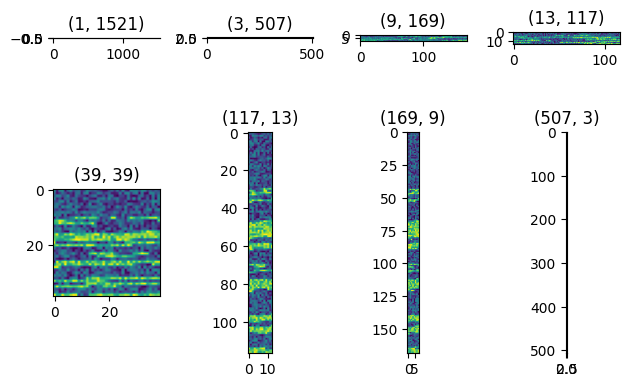

In [84]:
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

pics = [who.reshape(i, -1) for i in range(1, int(who.shape[0]/2)+1) if who.shape[0]%i==0]
for i in range(len(pics)):
    plt.subplot(241+i)  # 1 row, 3 columns, 1st subplot
    plt.imshow(pics[i])
    plt.title(f"{pics[i].shape}")
plt.tight_layout()
plt.show()

## Pista 5
Los monjes cometieron un error y rompieron la imagen en 6 partes, pero al unirlas nuevamente, equivocaron el orden y las unieron en horizontal en vez de en vertical.
- Separa la imagen en 6 partes de manera horizontal
- Vuelve a juntar las partes, pero ahora de manera vertical.

In [70]:
pic6 = np.hsplit(pic, 6)

ValueError: array split does not result in an equal division

## ¡Enhorabuena!
Seguramente has encontrado la solución al enigma. Ahora elige tú una imagen y esconde la información de manera similar. No olvides de enlistar los pasos que lleven a volver a obtener la información encontrada.